Data Science with Python

Assignment 01

Question 01

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()

In [2]:
vgsales_data = pd.read_csv('vgsales.csv')
vgsales_data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


How many missing values are there in each column of the Video Games Sales dataset?

In [3]:
missing_values = vgsales_data.isnull().sum()
print(missing_values)

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


Display the results in a bar chart

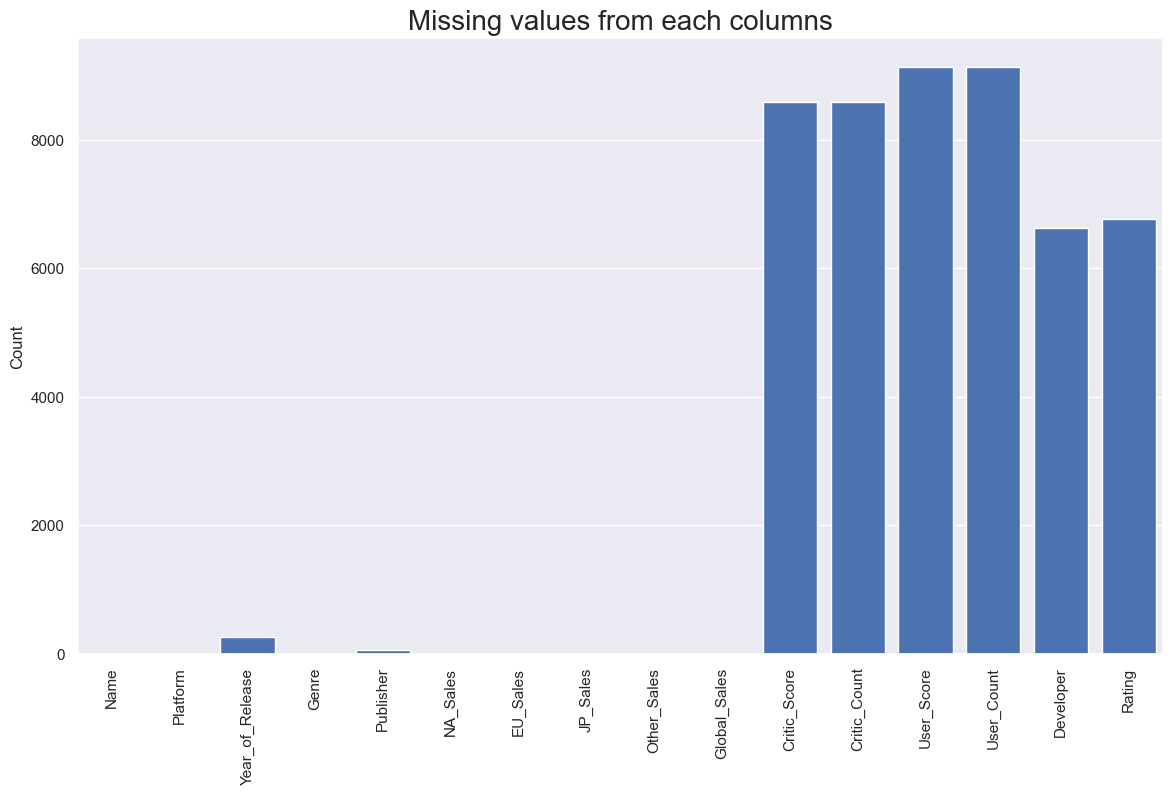

In [4]:
plt.figure(figsize=[14,8])
sns.barplot(missing_values,estimator='mean',saturation=1,fill=True)
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.title('Missing values from each columns',size = 20)
plt.show()

Question 02

How can we handle missing values in the "Year_of_Release" column? Write a function to
fill in missing values with the median year and show the first 10 rows in the dataframe.

In [5]:
vgsales_data.fillna({ 'Year_of_Release': vgsales_data['Year_of_Release'].median() }, inplace=True)
vgsales_data.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


Question 03

How does the distribution of video game genres look like in the dataset? Create a pie
chart to visualize the count of games in each genre

In [6]:
counts = vgsales_data['Genre'].value_counts()
fig = px.pie(names=counts.index, values=counts.values, title='Distribution of video game genres', width=800, height=600)
fig.show()

Question 04

How does the distribution of critic scores vary by genre? Create a boxplot to visualize the
distribution of critic scores by genre.

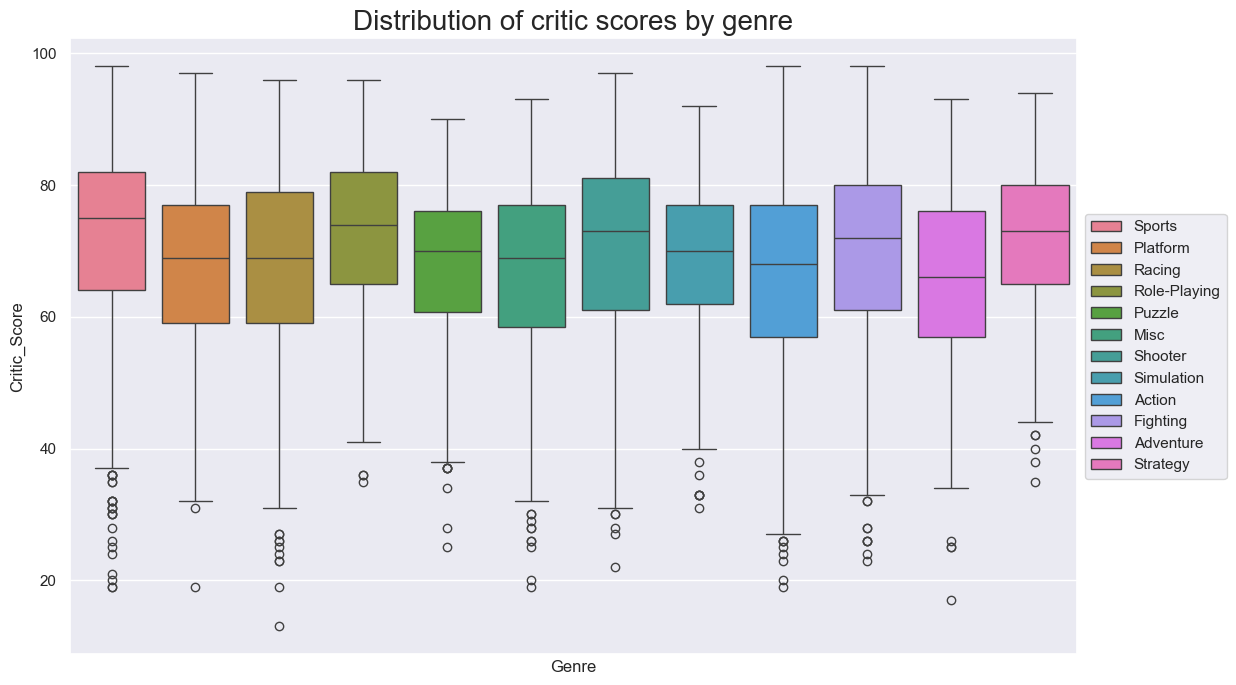

In [7]:
plt.figure(figsize=(13,8))
sns.boxplot(vgsales_data,x='Genre',y='Critic_Score',hue='Genre')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([], [])
plt.title('Distribution of critic scores by genre',size=20)
plt.show()


Question 05

Is there a correlation between critic scores and user scores for video games? Create a
scatter plot to investigate this relationship.


In [8]:
fig = px.scatter(vgsales_data, x='User_Score', y='Critic_Score', 
                 title='Correlation between critic scores and user scores', 
                 labels={'User_Score': 'User Score', 'Critic_Score': 'Critic Score'}, width=800, height=800)
fig.show()

Question 06

What is the average global sales for video games in each genre? Create a bar chart to
visualize the average global sales by genre

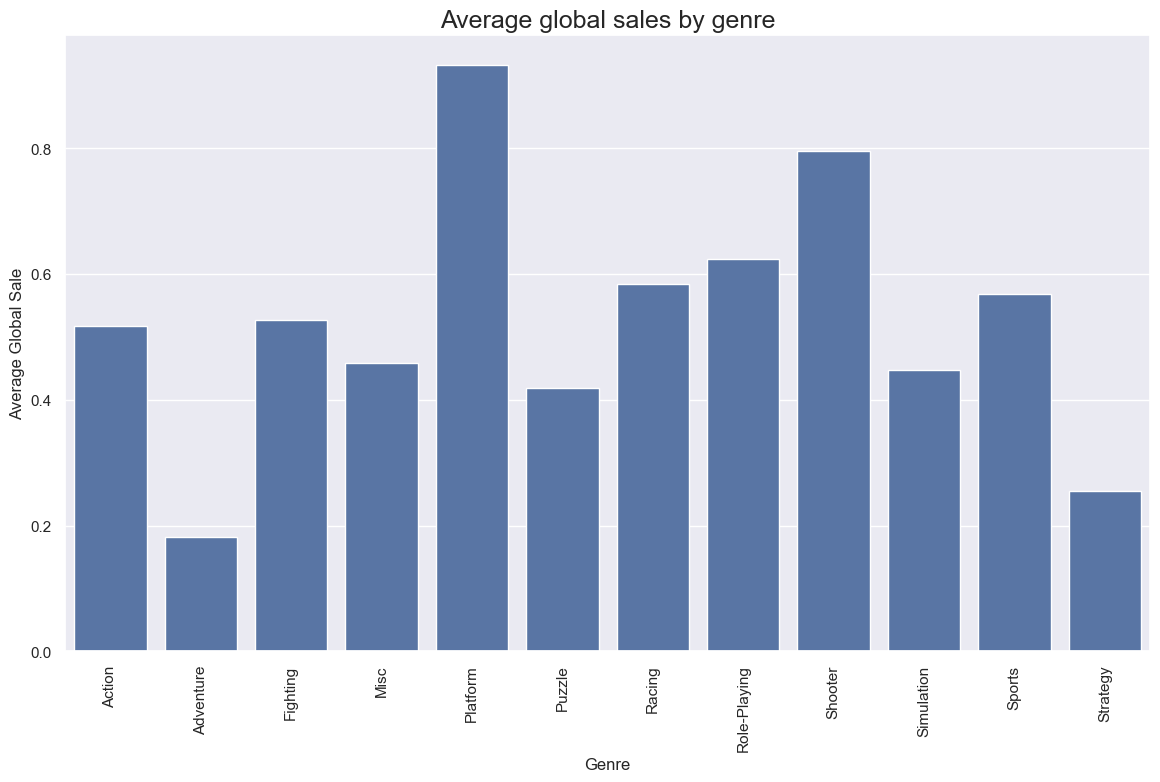

In [9]:
sales_by_genre = vgsales_data.groupby('Genre')['Global_Sales'].mean().reset_index()
plt.figure(figsize=[14,8])
sns.barplot(sales_by_genre,x='Genre',y='Global_Sales')
plt.xticks(rotation='vertical')
plt.ylabel('Average Global Sale')
plt.title('Average global sales by genre',size = 18)
plt.show()

Question 07

How many video games were released in each year, and what were the top 5 years with
the highest number of game releases? Write a function to calculate this

In [10]:
games_released_year = vgsales_data.groupby('Year_of_Release').size().reset_index(
    name='No_of_Releases')
games_released_year = games_released_year.sort_values(by='No_of_Releases',ascending=False)
games_released_year.head()

,Year_of_Release,No_of_Releases
27,2007.0,1466
28,2008.0,1427
29,2009.0,1426
30,2010.0,1255
31,2011.0,1136


Question 08

How has the total global sales of video games evolved over the years in the "vgsales"
dataset? Create a line plot to visualize the trend.

In [11]:
global_sale = vgsales_data.groupby('Year_of_Release')['Global_Sales'].sum().reset_index()
fig = px.line(global_sale,x='Year_of_Release',y='Global_Sales',
              title='Total global sales of video games evolved over the years', width=1200, height=600)
fig.show()

Question 09

Visualize the correlation between global sales, critic scores, and user scores in the
"vgsales" dataset using a heatmap

In [12]:
columns = ['Global_Sales','Critic_Score','User_Score']
vgsales_data_corr = vgsales_data[columns].corr()
fig = px.imshow(vgsales_data_corr,labels=dict(color="Correlation"),
                title='Correlation Heatmap: Global Sales, Critic Scores, and User Scores', width=800, height=600)
fig.show()

Question 10

Analyze the distribution of video game sales (e.g., global, North America, Europe, Japan,
other regions) in the "vgsales" dataset and identify which region contributes the most to
the total sales

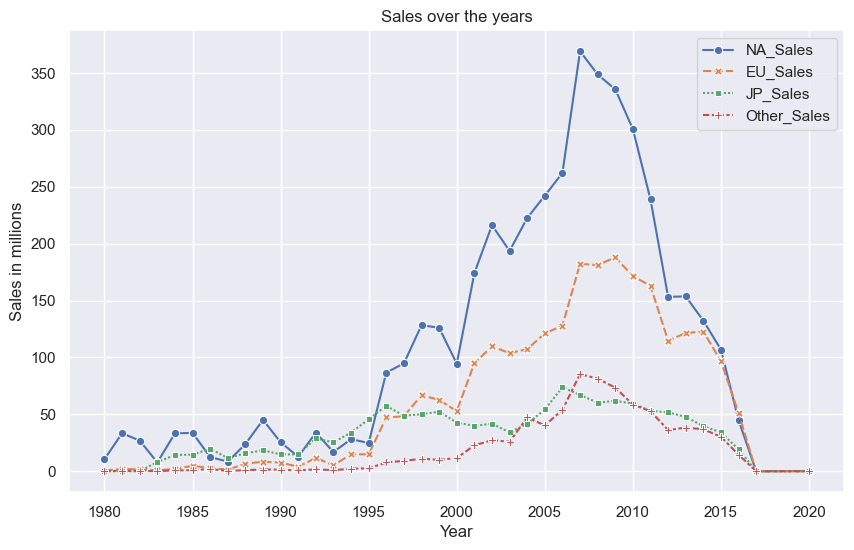

Most contributing region :  NA_Sales 
Sales value :  4402.62


In [13]:
sales_columns = ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
sales_by_year = vgsales_data[sales_columns].groupby('Year_of_Release').sum()

plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_by_year, markers=True)
plt.title('Sales over the years')
plt.xlabel('Year')
plt.ylabel('Sales in millions')
plt.show()

total_sales_by_region = vgsales_data[sales_columns[1:]].sum()
most_contributing_region = total_sales_by_region.idxmax()
max_sales_value = round(total_sales_by_region.max(),2)

print("Most contributing region : ", most_contributing_region, 
      "\nSales value : ", max_sales_value)
